In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.models import load_model
from sklearn.metrics import confusion_matrix

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.9.1


In [3]:
main_dir = "C:/Users/Vinicius/Desktop/DATA SCIENCE/BOOTCAMP/Projeto - IoT/cargas_eletricas"
df_original = pd.read_csv(f"{main_dir}/data/processed/pca_15.csv", index_col=[0])
df = df_original.copy()
df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Classes
0,0.804739,9.932256,-2.952120,1.727607,1.139999,1.220739,-3.010333,6.213570,-0.245333,-4.947468,3.224966,-0.333513,1.028451,-1.138487,-0.724202,1
1,16.187274,-0.789747,-4.951606,4.676206,0.482721,4.361189,-1.154607,-0.333671,-0.566406,0.654430,-2.366882,-1.191813,-2.809570,1.463848,-0.549039,1
2,4.970044,-1.496823,-6.723726,1.026952,-0.778361,-1.203140,-2.323602,1.599791,-1.668225,-1.622038,3.157523,0.739755,-0.118455,-1.120964,3.245290,1
3,2.460069,-2.860497,-5.417960,0.436978,-0.153589,-1.637444,-2.642204,3.179805,-0.552393,-2.282255,2.672498,0.495897,0.048147,-0.114480,0.224475,1
4,-4.168125,-5.182046,-1.309993,-1.370185,0.030386,0.221138,1.950496,0.416317,1.254989,-2.496386,0.705462,-1.148448,-0.652334,0.492994,-1.778258,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.147604,-4.117617,-0.477593,-1.120898,-0.850432,0.728094,-0.516973,-1.074211,-0.009713,0.359087,-0.867715,0.493532,-0.515811,0.491301,-0.320257,5
96,-6.106749,5.479102,2.056551,-0.721723,-1.440073,0.811643,0.444532,-0.957423,-0.112422,-1.579596,-0.670466,-0.316001,-0.048992,-0.485471,0.126146,6
97,-5.078876,0.747347,1.076584,-0.683721,-0.806197,-0.131654,1.458761,-0.715981,-0.807390,-2.602165,-1.113317,0.742115,-1.413547,0.724775,-1.939868,6
98,-4.547102,-13.501987,-1.218863,-1.386661,-1.644493,-4.081425,-2.921893,-1.743130,-0.530214,2.492557,-0.590194,0.727877,0.415277,1.097116,-0.958785,7


In [4]:
X = df.drop('Classes', axis=1)
Y = df['Classes']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [5]:
main_dir = "C:/Users/Vinicius/desktop/data science/bootcamp/Projeto - IoT/cargas_eletricas"
my_model = load_model(f"{main_dir}/code/model/NN15_test1.h5")

3/3 [==============================] - 1s 3ms/step


<AxesSubplot:ylabel='0'>

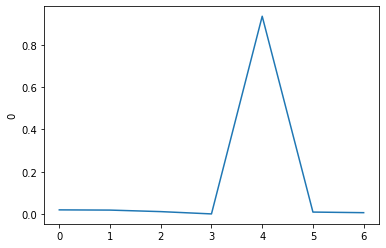

In [6]:
sns.lineplot(x=np.arange(0,7),y=pd.DataFrame(my_model.predict(x_train)).T[0])

In [7]:
np.argmax(my_model.predict(x_train),axis=1)

3/3 [==============================] - 0s 3ms/step


array([4, 2, 3, 4, 1, 2, 0, 3, 0, 2, 1, 4, 1, 6, 1, 2, 1, 3, 0, 1, 2, 1,
       1, 0, 2, 1, 3, 4, 3, 2, 2, 1, 4, 4, 0, 1, 2, 2, 6, 2, 2, 1, 2, 4,
       2, 1, 1, 4, 2, 1, 4, 6, 0, 2, 2, 2, 2, 0, 2, 4, 2, 1, 1, 3, 0, 4,
       0, 0, 0, 5], dtype=int64)

In [8]:
y_train_pred = np.argmax(my_model.predict(x_train), axis=1) + 1
y_test_pred = np.argmax(my_model.predict(x_test), axis=1) + 1

1/1 [==============================] - 0s 19ms/step


Text(0.5, 1.0, 'Confusion Matrix from training set')

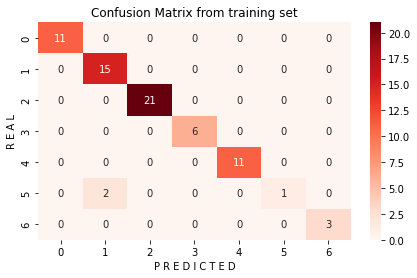

In [11]:
cmf_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(7,4))
sns.heatmap(cmf_train, annot=True, fmt='d', cmap='Reds', linecolor='gray')
plt.xlabel('P R E D I C T E D')
plt.ylabel('R E A L')
plt.title('Confusion Matrix from training set')

Text(0.5, 1.0, 'Confusion Matrix from test set')

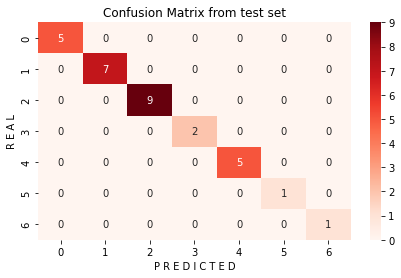

In [12]:
cmf_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7,4))
sns.heatmap(cmf_test, annot=True, fmt='d', cmap='Reds', linecolor='gray')
plt.xlabel('P R E D I C T E D')
plt.ylabel('R E A L')
plt.title('Confusion Matrix from test set')

# Não era para ser 100% no teste... 